# Dune Migration

_**Caitlin Haedrich and Pratikshya Regmi**, North Carolina State University_

In this notebook, we're going to introduce temporal datasets in GRASS to see how Jockeys Ridge has moved over the last two decades. We'll create a animation showing the migration.

***

## 1. Import Python Packages and Start GRASS Session

In [1]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("nags_head/PERMANENT");

Before we get started, we set and check the computational region.

In [2]:
!g.region region=jockeys_ridge -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      250984
south:      249364
west:       912140
east:       914462
nsres:      1
ewres:      1
rows:       1620
cols:       2322
cells:      3761640


***

## 2. Getting Started with GRASS Temporal Tools


To better handle the long time series of maps, GRASS has a temporal datasets which serve as containers for the individual layers in the time series. We can further manipulate them all together in the temporal dataset instead of the individual maps. For example, we can easily aggregate data at different time intervals, compute univariate statics, or set a univeral color scheme.

These temporal dataset can contain rasters (space-time raster dataset or _strds_), 3D rasters (_str3ds_) or vectors (_stvds_). Visit [the temporal data processing manual](https://grass.osgeo.org/grass83/manuals/temporalintro.html) for more info.

First, we create empty datasets of type strds (space-time raster dataset).

In [3]:
gs.run_command('t.create', output='JockeysRidge', type='strds',
                temporaltype='relative', title="Jockeys Ridge Elevation Series",
                description="from 1996 to 2020 with gaps")

After defining our temporal dataset, we can add and remove layers from it with `t.register` and `t.unregister`. 

In [4]:
# Get list of rasters we'd like to add to our dataset
DEMs = gs.read_command("g.list", type="raster", pattern="JR_????", separator="comma").strip().split(",")
DEMs

['JR_1996',
 'JR_1997',
 'JR_1998',
 'JR_2001',
 'JR_2004',
 'JR_2005',
 'JR_2008',
 'JR_2014',
 'JR_2016',
 'JR_2018',
 'JR_2020']

In [5]:
# Get the year of each DEM
years=[name[-4:] for name in DEMs]
years

['1996',
 '1997',
 '1998',
 '2001',
 '2004',
 '2005',
 '2008',
 '2014',
 '2016',
 '2018',
 '2020']

In [6]:
# Put DEM name and date together in table to register them
table = ""

for DEM, year in zip(DEMs, years):
    row = f"{DEM}|{year}\n"
    table += row

# Print formatted table
print(table)

# Write the formatted table to a text file
with open('./table.txt', 'w') as file:
    file.write(table)

JR_1996|1996
JR_1997|1997
JR_1998|1998
JR_2001|2001
JR_2004|2004
JR_2005|2005
JR_2008|2008
JR_2014|2014
JR_2016|2016
JR_2018|2018
JR_2020|2020



In [7]:
# Register rasters to dataset
gs.run_command("t.register", input="JockeysRidge", file="./table.txt", type="raster", unit="years")

Check what you have now in JockeysRidge dataset.

In [8]:
print(gs.read_command("t.rast.list", input="JockeysRidge", columns="name,start_time"))

name|start_time
JR_1996|1996
JR_1997|1997
JR_1998|1998
JR_2001|2001
JR_2004|2004
JR_2005|2005
JR_2008|2008
JR_2014|2014
JR_2016|2016
JR_2018|2018
JR_2020|2020



Set the same color table for all maps.

In [9]:
gs.run_command("t.rast.colors", input="JockeysRidge", color="elevation")

Animate the time series.

In [10]:
!r.mask raster=JR_2014

All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.


In [11]:
animation = gj.TimeSeriesMap()
animation.add_raster_series("JockeysRidge", fill_gaps=True)
animation.d_legend(color="black", at=(12,72,0,3), fontsize=12)
animation.d_barscale(length=250)
# animation.show()

In [12]:
animation.save(filename="migration.gif");

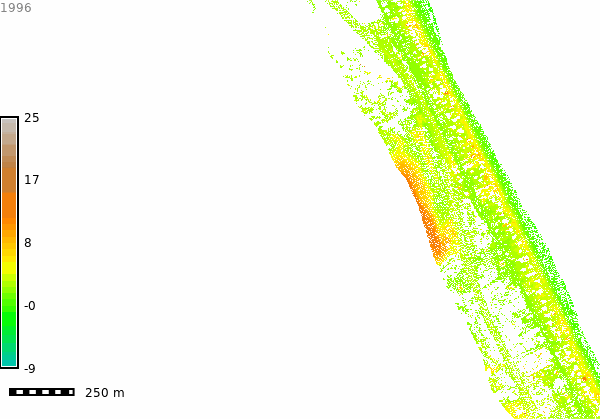

In [13]:
from IPython.display import display, Image

display(Image(filename="migration.gif"))

**Try it Yourself!**
** Qn 1**

_The animation reveals that the datasets for the years 1996, 1997, 1998, 2000, 2004, 2005, 2006, and 2007 are incomplete. Modify the code above to adjust the DEM list to include only the years with complete datasets._

<details>
    <summary>👉 <b>Hint!!</b></summary>

```python
DEMs=['JR_2001','JR_2008','JR_2014','JR_2016','JR_2018','JR_2020']
``` 
</details>


**Hurricane Floyd was a very powerful Cape Verde hurricane which struck the Bahamas and the East Coast of the United States. It was the sixth named storm, fourth hurricane, and third major hurricane in the 1999 Atlantic hurricane season.**

![](img/Floyd_banner.png)

**We have lidar datasets that were taken before and after hurricane (JR_1999_0909, JR_1999_0918). Using the dataset provided, calculate the difference in landmass volume before and after the impact of Hurricane Floyd. Also, compute the net volume change**

<details>
    <summary>👉 <b>Hints!!!</b></summary>

```python
r.mapcalc
``` 
    
```python
r.stats
```
</details>


In [15]:
!g.list type=raster

JR_1996
JR_1996_count
JR_1996_mask
JR_1997
JR_1997_count
JR_1997_mask
JR_1998
JR_1998_count
JR_1998_mask
JR_1999_0909
JR_1999_0909_count
JR_1999_0909_mask
JR_1999_0918
JR_1999_0918_count
JR_1999_0918_mask
JR_1999_1104
JR_1999_1104_count
JR_1999_1104_mask
JR_2001
JR_2001_count
JR_2001_mask
JR_2004
JR_2004_count
JR_2004_mask
JR_2005
JR_2005_count
JR_2005_mask
JR_2008
JR_2008_count
JR_2008_mask
JR_2014
JR_2014_08m
JR_2014_count
JR_2014_duneRidge
JR_2014_duneToe
JR_2014_duneToe_new
JR_2014_mask
JR_2014_raw
JR_2014_shore_rast
JR_2014_spline
JR_2016
JR_2016_count
JR_2016_mask
JR_2016_raw
JR_2018
JR_2018_count
JR_2018_mask
JR_2018_raw
JR_2020
JR_2020_count
JR_2020_mask
JR_2020_raw
MASK
NH_2008_08m_sm_rast
cost
cumulative_cost
deviation_map
naip_2014.1
naip_2014.2
naip_2014.3
naip_2020.1
naip_2020.2
naip_2020.3
naip_rgb
sheet
sheet_BC
sheet_BC_buff



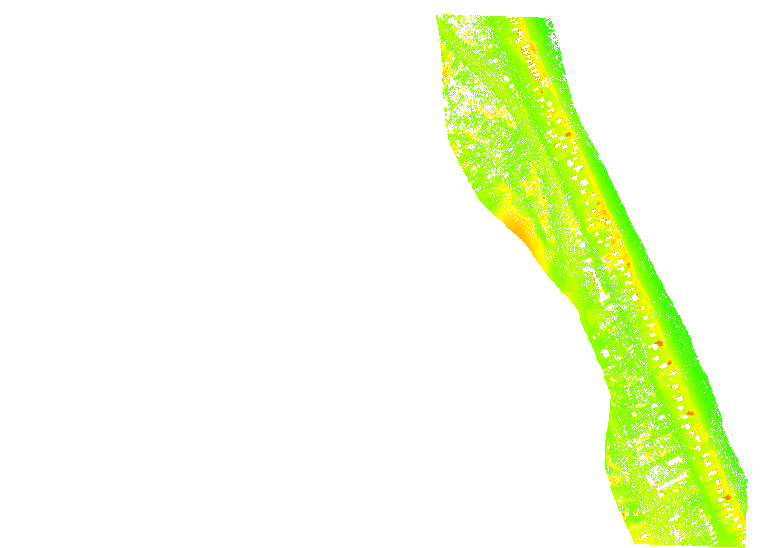
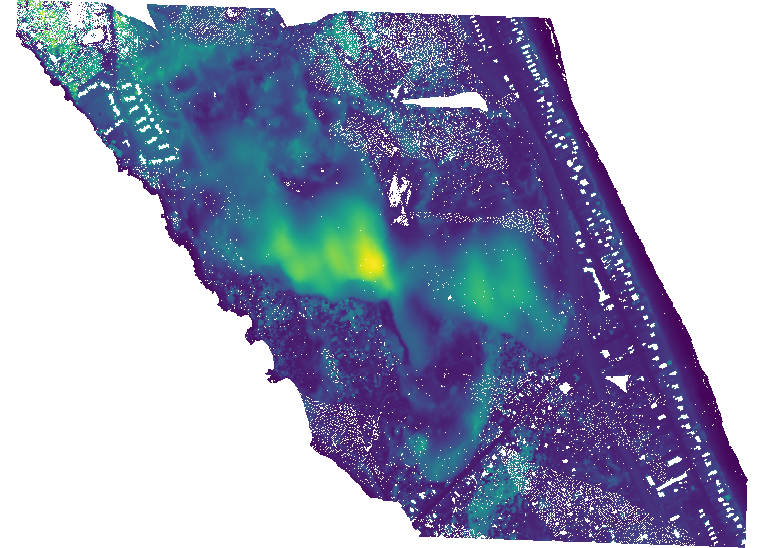

In [19]:
fig = gj.InteractiveMap(width=800, tiles="OpenStreetMap")
fig.add_raster("JR_1998")
fig.add_raster("JR_1999_1104")
fig.add_layer_control()
fig.show()